In [12]:
import numpy as np


def initialize_centroids(X,k):
    idx = np.random.choice(len(X),k,replace=False)
    return X[idx]

def assign_clusters(X,centroids):
    distances = np.linalg.norm(X[:,None]-centroids[None,:],axis=2)
    return np.argmin(distances,axis=1)
def update_centroids(X,labels,k):
    new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])
    return new_centroids
def kmeans(X,k,max_iters=100,tol=1e-4):
    centroids = initialize_centroids(X,k)
    for _ in range(max_iters):
        old_centroids = centroids.copy()
        labels = assign_clusters(X,centroids)
        centroids = update_centroids(X,labels,k)
        if np.linalg.norm(centroids-old_centroids)<tol:
            break
    return centroids,labels

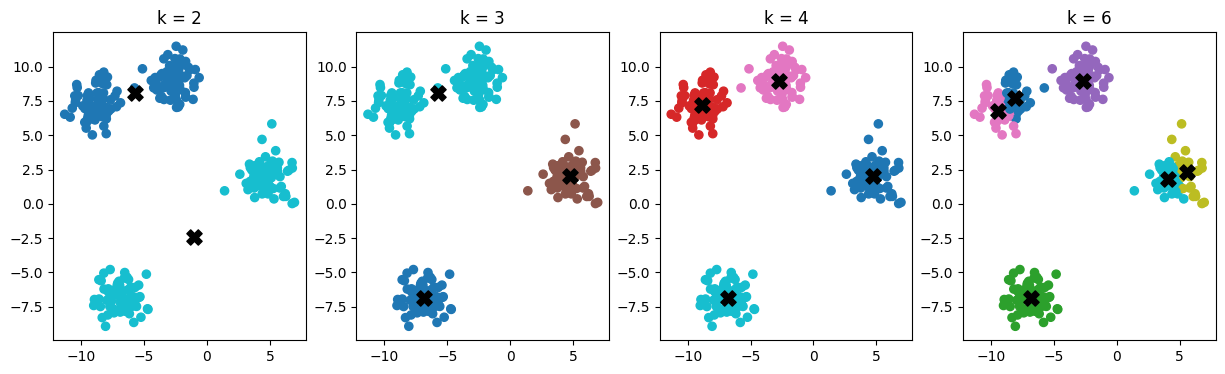

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

def visualize_k(X, k_values):
    fig, axes = plt.subplots(1, len(k_values), figsize=(15,4))

    for ax, k in zip(axes, k_values):
        centroids, labels = kmeans(X, k)

        ax.scatter(X[:,0], X[:,1], c=labels, cmap="tab10", s=35)
        ax.scatter(centroids[:,0], centroids[:,1], c="black", s=120, marker="X")
        ax.set_title(f"k = {k}")

    plt.show()

visualize_k(X, k_values=[2, 3, 4, 6])
